# Bitcoin Price Prediction - Liniear Regression 
---
BTC price prediction using Linear Regression

## <font color=#FFBD33>0. Get BTC historical data from CoinGecko API</font>

In [1]:
# Import library
import datetime as dt
import pandas as pd #type: ignore
import requests as req

In [2]:
# get BTC historical data from CoinGecko API
btc_ohlc= req.get(f'https://api.coingecko.com/api/v3/coins/bitcoin/ohlc?vs_currency=usd&days=max')

# transform to json
json_text = btc_ohlc.json()

# parsing json and create dataframe
btc_df = pd.DataFrame(data = json_text, columns = ['Timestamp', 'Open', 'High', 'Low', 'Close'])

#adding dates column
btc_df['Dates'] = pd.to_datetime(btc_df['Timestamp'], unit='ms')

#save dataframe into csv
btc_df.to_csv('btc_ohlc.csv', encoding='utf-8', index=False)
btc_df.head()

,Timestamp,Open,High,Low,Close,Dates
0,1367280000000,135.30,141.96,135.30,135.30,2013-04-30
1,1367539200000,117.00,117.00,91.01,91.01,2013-05-03
2,1367884800000,111.25,118.33,106.40,106.40,2013-05-07
3,1368230400000,112.64,118.78,112.64,113.01,2013-05-11
4,1368576000000,114.71,117.18,114.16,114.16,2013-05-15


## <font color=#FFBD33>1. Load Dataset</font>

In [3]:
#Import Library
import pandas as pd
import numpy as np
import seaborn as sns 
import datetime as dt
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [4]:
data = pd.read_csv('btc_ohlc.csv', sep=',')
print("Number of datapoint:", len(data))
data.head() #,encoding ='latin1')

Number of datapoint: 917


,Timestamp,Open,High,Low,Close,Dates
0,1367280000000,135.30,141.96,135.30,135.30,2013-04-30
1,1367539200000,117.00,117.00,91.01,91.01,2013-05-03
2,1367884800000,111.25,118.33,106.40,106.40,2013-05-07
3,1368230400000,112.64,118.78,112.64,113.01,2013-05-11
4,1368576000000,114.71,117.18,114.16,114.16,2013-05-15


## <font color=#FFBD33>2. EDA </font>

In [5]:
#Check Data Dtypes
data.dtypes

Timestamp      int64
Open         float64
High         float64
Low          float64
Close        float64
Dates         object
dtype: object

In [6]:
data.describe()

,Timestamp,Open,High,Low,Close
count,9.170000e+02,917.000000,917.000000,917.000000,917.000000
mean,1.519020e+12,11028.342268,11370.142999,10679.879771,11035.328539
std,8.774597e+10,15646.754759,16112.510210,15142.304420,15619.569838
min,1.367280e+12,77.500000,78.800000,67.810000,68.080000
25%,1.443312e+12,483.420000,497.320000,471.130000,480.030000
50%,1.518998e+12,4863.190000,4863.190000,4556.600000,4807.930000
75%,1.594771e+12,11385.060000,11768.130000,11066.310000,11435.570000
max,1.670717e+12,65005.650000,67617.020000,64432.050000,65648.980000


In [7]:
data.isnull().sum()

Timestamp    0
Open         0
High         0
Low          0
Close        0
Dates        0
dtype: int64

## <font color=#FFBD33>3. Visualize Numerical Data </font>

In [8]:
df = data

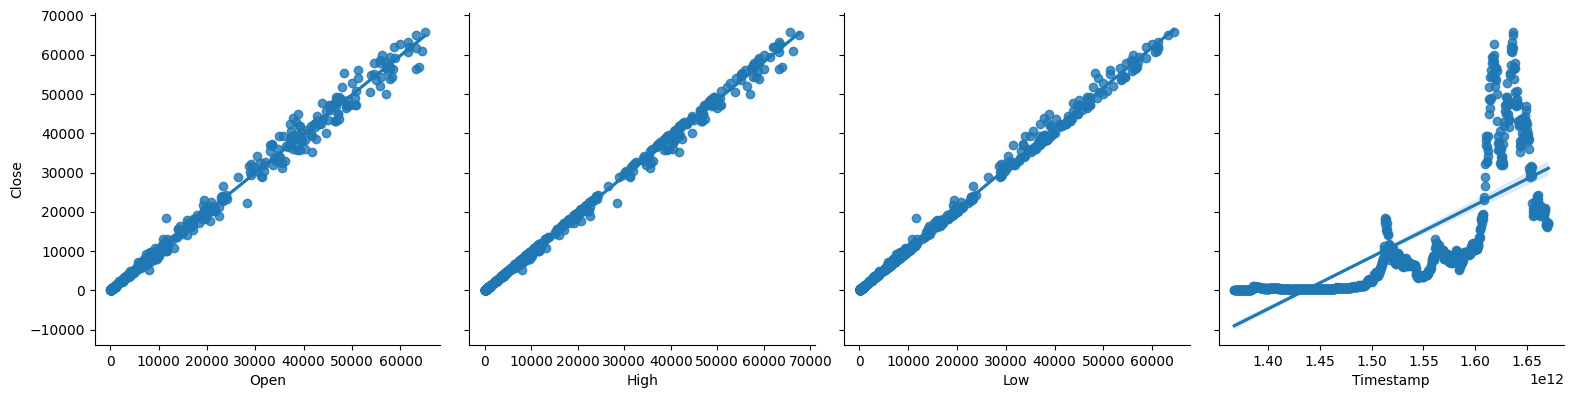

In [9]:
# Correlation check
def pp(x,y,z,a):
    sns.pairplot(df, x_vars=[x,y,z,a], y_vars='Close',height=4, aspect=1, kind='reg')
    plt.show()

pp('Open', 'High', 'Low', 'Timestamp')

In [10]:
# Correlation check 
df.corr().style.background_gradient().set_precision(2)

,Timestamp,Open,High,Low,Close
Timestamp,1.00,0.74,0.74,0.74,0.74
Open,0.74,1.00,1.00,1.00,1.00
High,0.74,1.00,1.00,1.00,1.00
Low,0.74,1.00,1.00,1.00,1.00
Close,0.74,1.00,1.00,1.00,1.00


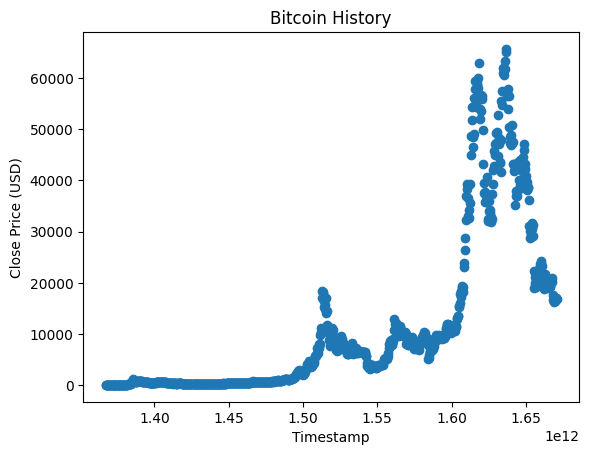

In [11]:
# Scatter Plot "Timestamp" & "Prices"
plt.scatter(df['Timestamp'], df['Close'])
plt.xlabel('Timestamp')
plt.ylabel('Close Price (USD)')
plt.title('Bitcoin History')
plt.show()

## <font color=#FFBD33>4. Model Selection</font>

In [12]:
# select the columns to fit the model
x = df.drop(columns=['Dates', 'Close', 'Timestamp'])
y = df['Close']

In [13]:
x.head()

,Open,High,Low
0,135.30,141.96,135.30
1,117.00,117.00,91.01
2,111.25,118.33,106.40
3,112.64,118.78,112.64
4,114.71,117.18,114.16


In [14]:
y.head()

0    135.30
1     91.01
2    106.40
3    113.01
4    114.16
Name: Close, dtype: float64

In [15]:
#Split data into a 85% training data set and 15% testing data set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15, random_state=0, shuffle=False)

In [16]:
#check shape from training & testing
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(779, 3)
(779,)
(138, 3)
(138,)


In [17]:
# Create object liniear regression
lin_reg = LinearRegression()

In [18]:
lin_reg.fit(x_train, y_train)

LinearRegression()

## <font color=#FFBD33>5. Model Evaluation </font>

In [19]:
#accuracy score using r2_score
from sklearn.metrics import r2_score

prediction = lin_reg.predict(x_test)
print('Accuracy of model : ', r2_score(prediction, y_test))

Accuracy of model :  0.9978183753686328


In [20]:
#accuracy score using cross_val_score
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lin_reg, x_test, y_test)
print(scores)

[0.98551349 0.98862712 0.96888467 0.99126939 0.93954039]


In [21]:
# MAE, MSE, RMSE
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test,prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,prediction)))


MAE: 433.8304476487483
MSE: 413232.9705641678
RMSE: 642.8319924865033


In [22]:
diff = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': prediction})
diff.head()

,Actual Price,Predicted Price
779,33950.79,33829.485947
780,34149.99,34578.538155
781,33704.54,33025.229952
782,32878.50,32859.789005
783,31919.39,31509.900841


## <font color=#FFBD33>6. Prediction </font>

In [23]:
# Test for actual predictions
# Take last row from dataset, i.e from one before splitting
sample_data = data.iloc[-2]
sample_data

Timestamp    1670371200000
Open              16923.38
High              17149.93
Low               16923.38
Close             17085.64
Dates           2022-12-07
Name: 915, dtype: object

In [24]:
# Create sample
sample = [[17186, 17186, 16972]]
# Testing sample
sample_predict = lin_reg.predict(sample)

print(sample_predict)

[16942.89552578]


In [25]:
# make predictions of future values, shift data by 30 days
future_set = df.shift(periods=30).tail(30)

In [26]:
future_set.head()

,Timestamp,Open,High,Low,Close,Dates
887,1.651277e+12,39237.95,39741.77,38650.55,38650.55,2022-04-30
888,1.651536e+12,37820.61,38561.57,37820.61,38561.57,2022-05-03
889,1.651882e+12,37758.50,39699.02,36116.39,36116.39,2022-05-07
890,1.652227e+12,35573.31,35573.31,30269.59,31026.93,2022-05-11
891,1.652573e+12,28913.49,30189.33,28913.49,30189.33,2022-05-15


In [27]:
x1 = future_set.drop(columns=['Dates', 'Timestamp', 'Close'])
future_predict = lin_reg.predict(x1)

Text(0, 0.5, '$ Price')

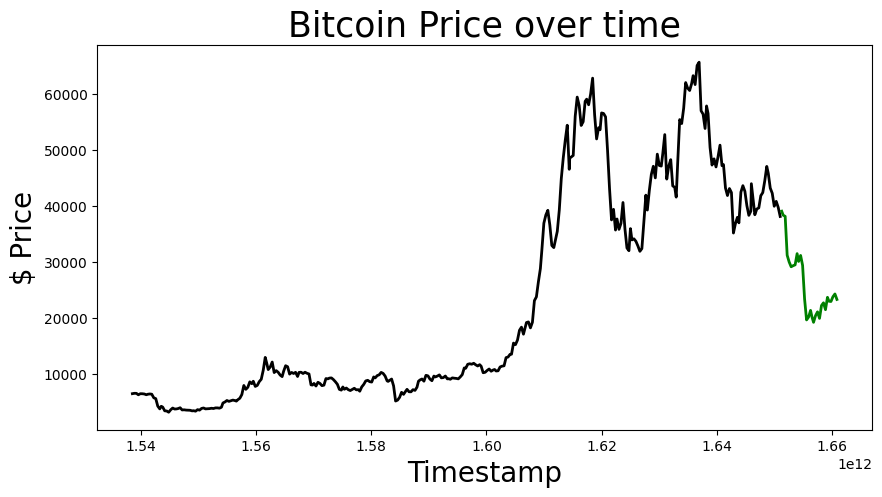

In [28]:
plt.figure(figsize = (10, 5))
plt.plot(df["Timestamp"][-400:-60], df["Close"][-400:-60], color='black', lw=2)
plt.plot(future_set["Timestamp"], future_predict, color='green', lw=2)
plt.title("Bitcoin Price over time", size=25)
plt.xlabel("Timestamp", size=20)
plt.ylabel("$ Price", size=20)


In [29]:
#final testing
#bitcoin's open, high, close price today 
ohl = [[17109, 17268, 17084]]

#btc's close price prediction
predict = lin_reg.predict(ohl)
print(predict)

[17169.16307434]


## <font color=#FFBD33>7. Saving LR Model </font>

In [30]:
import pickle
pickle_out = open ("btc_prediction_lr.pkl", "wb")
pickle.dump(lin_reg, pickle_out)
pickle_out.close()